[![General Assembly Logo](https://camo.githubusercontent.com/1a91b05b8f4d44b5bbfb83abac2b0996d8e26c92/687474703a2f2f692e696d6775722e636f6d2f6b6538555354712e706e67)](https://generalassemb.ly/education/web-development-immersive)
![Misk Logo](https://i.ibb.co/KmXhJbm/Webp-net-resizeimage-1.png)

# K-Means Clustering with Seeds Data (Lab)

_Instructor: Husain Amer_

---

In this lab we are going to try to group some plants using the K-Means algorithm.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

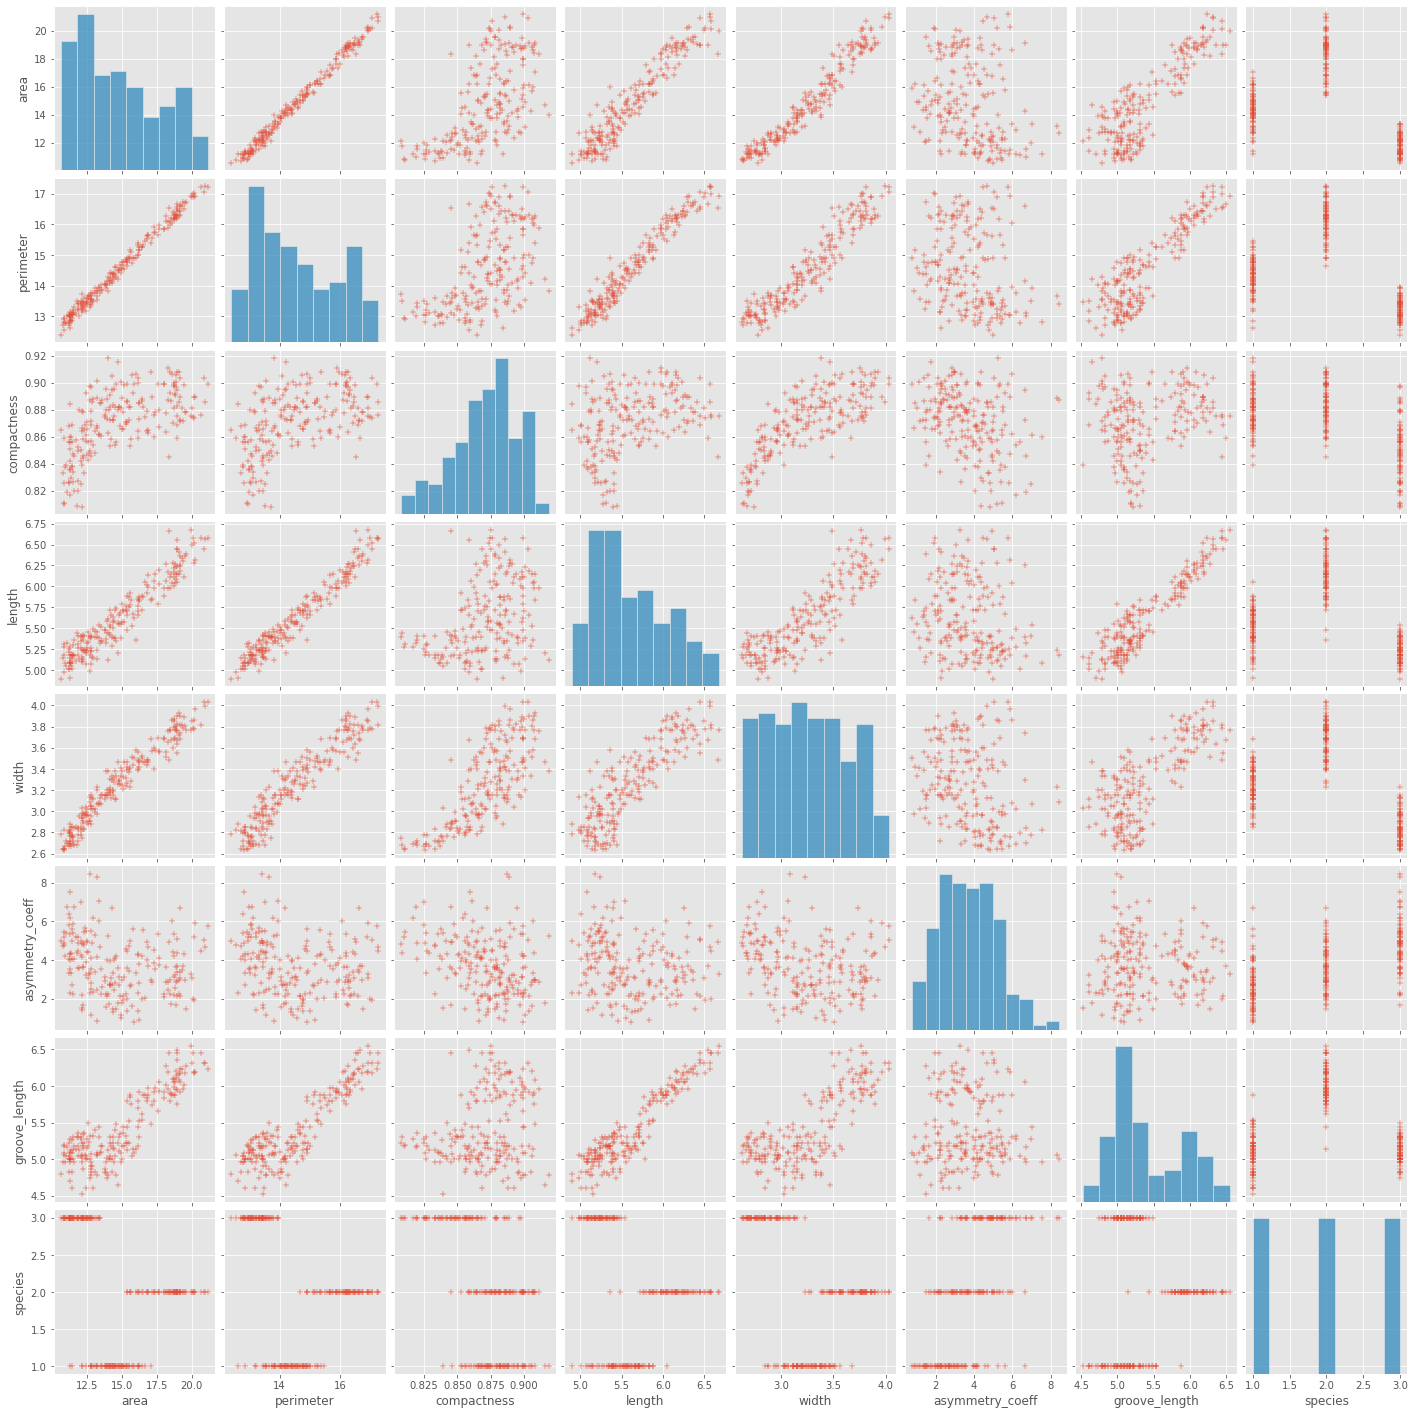

In [4]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot with and without the "species" hue.
sns.pairplot(seeds, markers="+");
# sns.pairplot(seeds, hue='species')

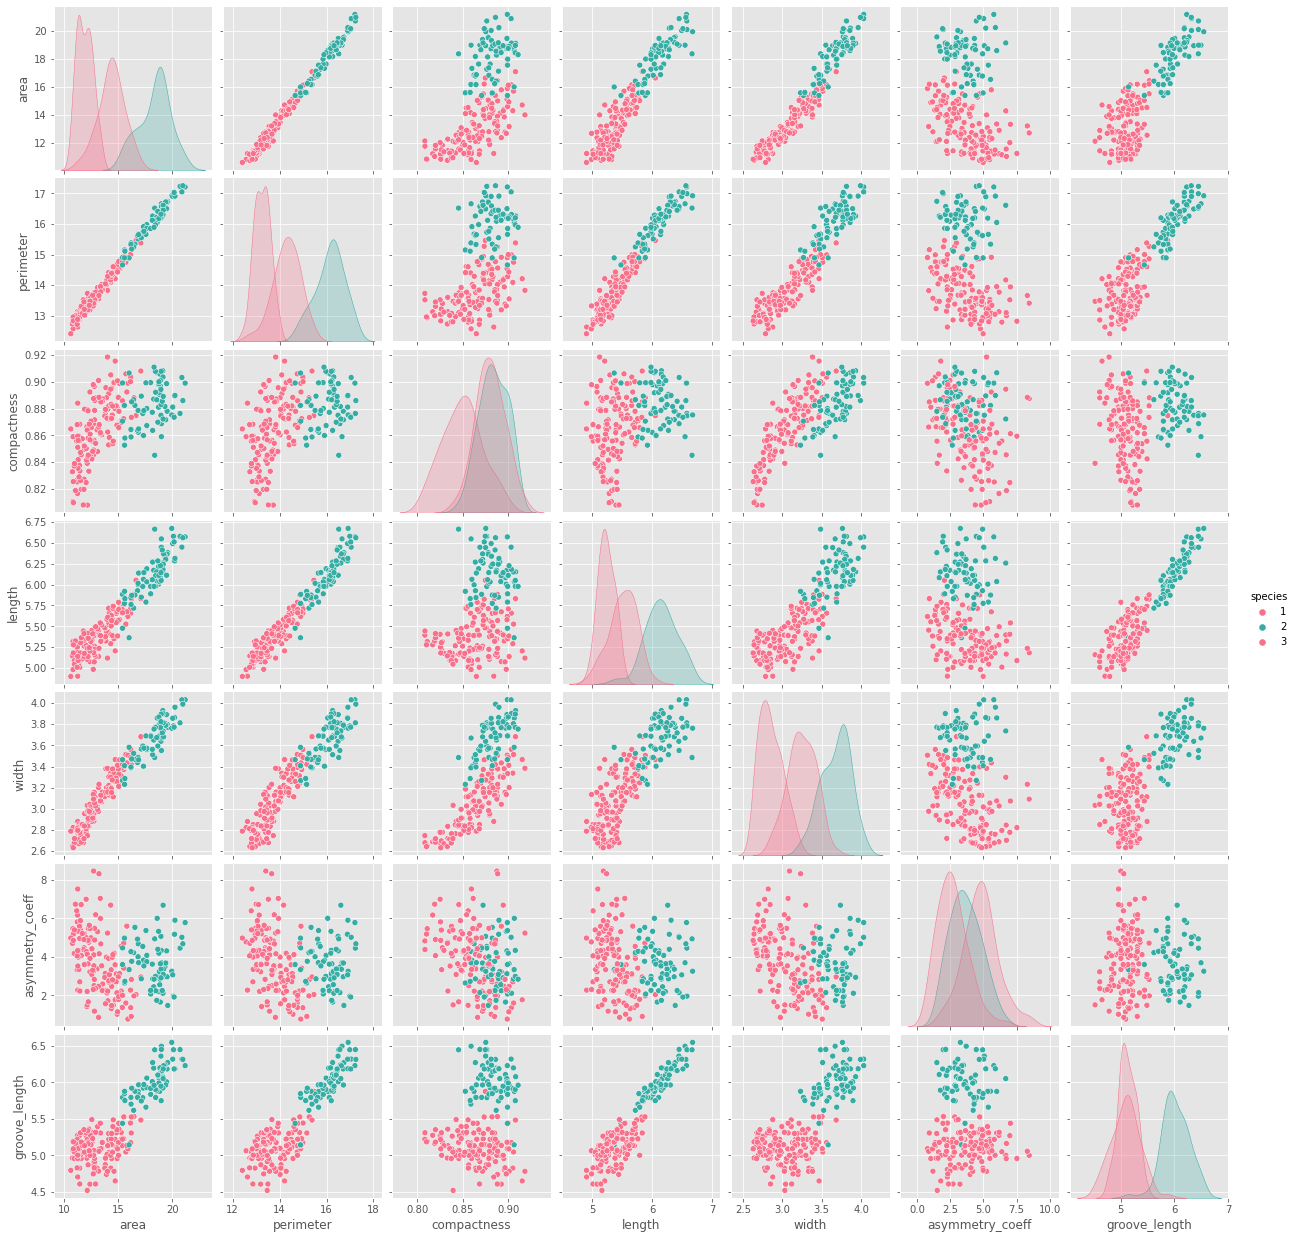

In [5]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species', palette="husl");
# classes appear to have a similar number of samples.
# magenta consistently looks like the divisor between the green and red classes.

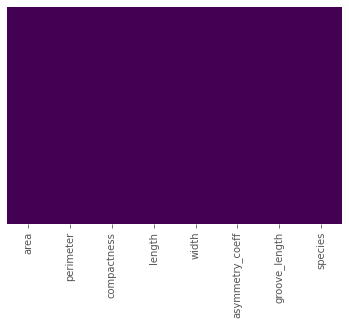

In [6]:
# Check for nulls:
sns.heatmap(seeds.isnull(), yticklabels=False, cbar=False, cmap='viridis');

According to the plot, we do not have any missing values in the datasets.

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [7]:
# Drop 'species', which is currently acting as a target (categorical):
X = seeds.drop(columns='species')

In [8]:
# Necessary processing imports
from sklearn.preprocessing import StandardScaler

# Initialize the Scaler
SS = StandardScaler()

# Fit the data using the scaler (scale the data)
X = SS.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [9]:
from sklearn.cluster import KMeans

# Bulid KMeans model with 8 number of clusters 
model = KMeans(n_clusters=8, random_state=0)

# Fit train data into model
model.fit(X)

KMeans(random_state=0)

### 5. Get the labels and centroids for our first clustering model.

In [10]:
# A:
# Get prediction
model.labels_

array([6, 6, 2, 2, 6, 6, 6, 6, 0, 6, 0, 6, 2, 2, 2, 2, 1, 6, 2, 7, 6, 6,
       6, 2, 6, 6, 2, 2, 6, 7, 2, 6, 6, 6, 6, 6, 0, 5, 6, 1, 2, 2, 2, 0,
       6, 2, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 7, 2, 2,
       6, 6, 6, 7, 0, 0, 0, 5, 0, 0, 0, 4, 4, 0, 0, 5, 4, 4, 4, 5, 5, 4,
       4, 4, 4, 5, 5, 5, 4, 0, 4, 4, 4, 5, 0, 5, 5, 4, 4, 5, 5, 0, 4, 5,
       5, 4, 5, 4, 4, 4, 5, 5, 5, 4, 4, 0, 0, 5, 6, 5, 4, 5, 4, 0, 5, 5,
       0, 0, 0, 6, 0, 0, 0, 0, 7, 1, 1, 1, 3, 3, 7, 7, 7, 3, 7, 3, 3, 7,
       7, 3, 7, 3, 3, 3, 7, 7, 7, 7, 3, 2, 7, 7, 3, 7, 3, 3, 7, 3, 3, 7,
       3, 3, 3, 7, 7, 1, 7, 7, 1, 3, 3, 7, 1, 7, 3, 7, 2, 3, 7, 1, 1, 1,
       7, 2, 1, 2, 7, 1, 7, 2, 7, 1, 7, 1])

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue, or, plot with colormap)_

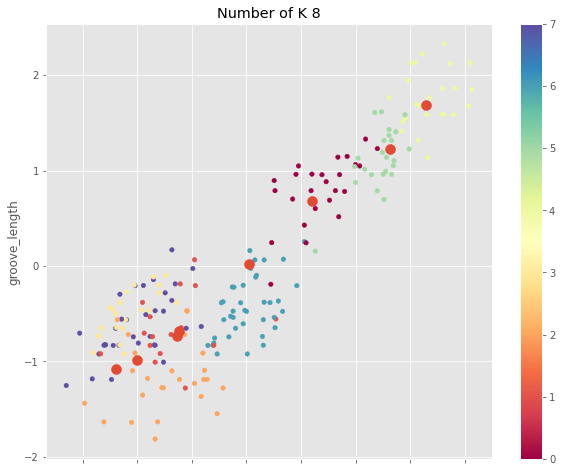

The average silhouette_score for 8 clusters is :  0.2503766965363411


In [12]:
# A:
from sklearn.metrics import silhouette_score


# Fit train data into model and predict cluster label
cluster_labels = model.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, cluster_labels)

# Define dataframe contains the perimeter and groove_length columns
df_std = pd.DataFrame((X[:,[1,6]]),columns=['perimeter', 'groove_length'])

# Add the prediction to dataframe as predicted group
df_std['predicted_group'] = model.labels_

# Get centroids
centroids = model.cluster_centers_

df_std.plot(x="perimeter", y="groove_length", kind="scatter", c=df_std['predicted_group'], colormap='Spectral',figsize=(10,8))
plt.scatter(centroids[:,0], centroids[:,1], marker='o',s=100)
plt.title('Number of K 8')
plt.show();
print('The average silhouette_score for 8 clusters is : ',silhouette_avg)

# Define the dictionary of silhouette scores  
silhouette_scores = {}
silhouette_scores['8 clusters'] = silhouette_avg

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

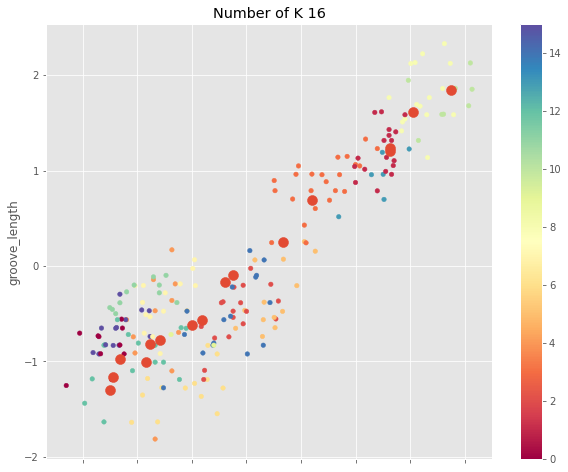

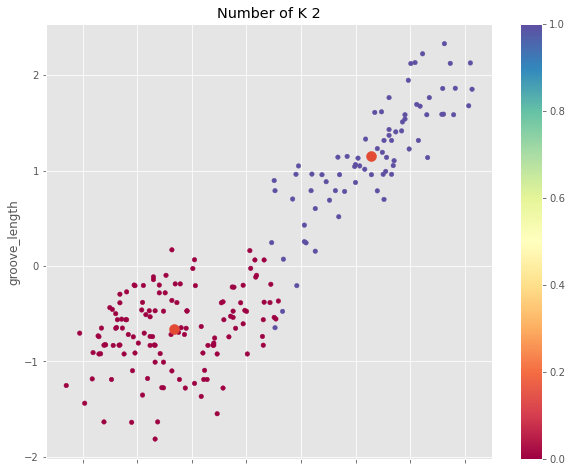

In [13]:
# A:
import random

#Define random numbers
n_k1, n_k2 = random.randint(1,25), random.randint(1,25)

for n_k in [n_k1,n_k2]:
    
    # Bulid KMeans model with two random number of clusters 
    model = KMeans(n_clusters=n_k, random_state=0)
    
    # Fit train data into model and predict cluster label
    cluster_labels = model.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    
    silhouette_scores[f'{n_k} clusters'] = silhouette_avg
    
    # Get centroids 
    centroids = model.cluster_centers_
    
    # Add the prediction to dataframe as predicted group
    df_std['predicted_group'] = model.labels_
    
    df_std.plot(x="perimeter", y="groove_length", kind="scatter", c=df_std['predicted_group'], colormap='Spectral',figsize=(10,8))
    plt.scatter(centroids[:,0], centroids[:,1], marker='o',s=100);
    plt.title(f'Number of K {n_k}')
    plt.show();
    

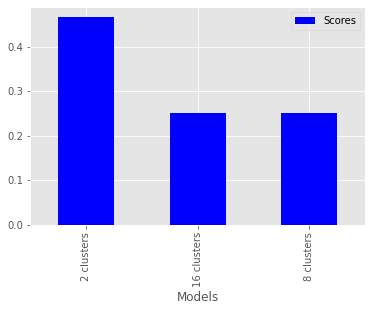

In [14]:
# Define dataframes has the all model with their silhouette scores
best_score_df = pd.DataFrame({'Models':silhouette_scores.keys(),'Scores':silhouette_scores.values()})
best_score_df.sort_values('Scores',ascending=False).plot(kind='bar',x='Models',y='Scores',colormap='winter');

The 2 clusters has the best mean score of silhouette but it does not mean a perfect cluster since we need to see the distribution of clusters.